Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Text: MAo8 BZM] (Confidence: 0.27)
Detected Text: L456 LhC (Confidence: 0.25)


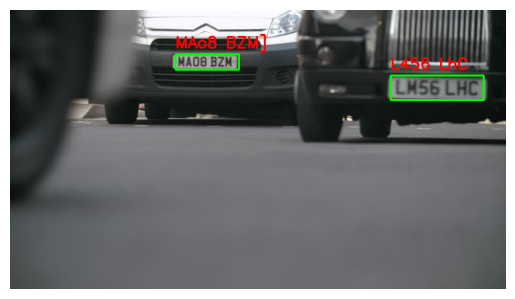

In [2]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'test_image.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Increase contrast
alpha = 1.5  # Contrast control
beta = 0     # Brightness control
adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)

# Sharpen the image
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
sharpened = cv2.filter2D(adjusted, -1, kernel)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the preprocessed image
results = reader.readtext(sharpened)

# Draw bounding boxes around detected text
for (bbox, text, prob) in results:
    # Get the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw a rectangle around the text and display the recognized text
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    print(f"Detected Text: {text} (Confidence: {prob:.2f})")

# Display the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()